
### Import the Packages

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
%matplotlib inline
plt.style.use('ggplot')

### Mount the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import the dataset

In [ ]:
#@title
cab_rides=pd.read_csv('/content/drive/MyDrive/Python Project/cab_rides.csv')
weather=pd.read_csv('/content/drive/MyDrive/Python Project/weather.csv')

In [ ]:
#@title
cab_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
#@title
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [ ]:
#@title
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


# Univariate Analysis

## Missing Values Check


### Cab Rides

In [ ]:
#@title
cab_rides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [ ]:
#@title
# creating bool series True for NaN values

for i in range(len(cab_rides.columns)):
  bool_series = pd.isnull(cab_rides[cab_rides.columns[i]])
  print("\nFor column", cab_rides.columns[i],"\n Number of Null values ", sum(pd.isnull(cab_rides[cab_rides.columns[i]])),", pct of total rows", sum(pd.isnull(cab_rides[cab_rides.columns[i]]))*100/len(cab_rides),"%")
  
   


For column distance 
 Number of Null values  0 , pct of total rows 0.0 %

For column cab_type 
 Number of Null values  0 , pct of total rows 0.0 %

For column time_stamp 
 Number of Null values  0 , pct of total rows 0.0 %

For column destination 
 Number of Null values  0 , pct of total rows 0.0 %

For column source 
 Number of Null values  0 , pct of total rows 0.0 %

For column price 
 Number of Null values  55095 , pct of total rows 7.949402009317948 %

For column surge_multiplier 
 Number of Null values  0 , pct of total rows 0.0 %

For column id 
 Number of Null values  0 , pct of total rows 0.0 %

For column product_id 
 Number of Null values  0 , pct of total rows 0.0 %

For column name 
 Number of Null values  0 , pct of total rows 0.0 %


In [ ]:
#@title
#Sample of rows which have price as NULL
cab_rides[pd.isnull(cab_rides[cab_rides.columns[5]])].head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
18,1.11,Uber,1543673584211,West End,North End,NaN,1.0,fa5fb705-03a0-4eb9-82d9-7fe80872f754,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
31,2.48,Uber,1543794776318,South Station,Beacon Hill,NaN,1.0,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
40,2.94,Uber,1543523885298,Fenway,North Station,NaN,1.0,7f47ff53-7cf2-4a6a-8049-83c90e042593,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
60,1.16,Uber,1544731816318,West End,North End,NaN,1.0,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
69,2.67,Uber,1543583283653,Beacon Hill,North End,NaN,1.0,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi


As the Missing Values count is less than 8%, drop the rows which have price as NULL

In [ ]:
#@title
print(len(cab_rides))
cab_rides.dropna(inplace=True)
print(len(cab_rides))

693071
637976


In [ ]:
#@title
#Sample of rows which have price as NULL
cab_rides[pd.isnull(cab_rides[cab_rides.columns[5]])].head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name


### Weather

In [ ]:
#@title
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [ ]:
#@title
# creating bool series True for NaN values

for i in range(len(weather.columns)):
  bool_series = pd.isnull(weather[weather.columns[i]])
  print("\nFor column", weather.columns[i],"\n Number of Null values ", sum(pd.isnull(weather[weather.columns[i]])),", pct of total rows", sum(pd.isnull(weather[weather.columns[i]]))*100/len(weather),"%")
  
   


For column temp 
 Number of Null values  0 , pct of total rows 0.0 %

For column location 
 Number of Null values  0 , pct of total rows 0.0 %

For column clouds 
 Number of Null values  0 , pct of total rows 0.0 %

For column pressure 
 Number of Null values  0 , pct of total rows 0.0 %

For column rain 
 Number of Null values  5382 , pct of total rows 85.75525812619503 %

For column time_stamp 
 Number of Null values  0 , pct of total rows 0.0 %

For column humidity 
 Number of Null values  0 , pct of total rows 0.0 %

For column wind 
 Number of Null values  0 , pct of total rows 0.0 %


As the Missing Values count is more than 20% for column rain, drop the column

In [ ]:
#@title
weather.drop('rain',axis =1, inplace=True)

## Outliers and Range checks

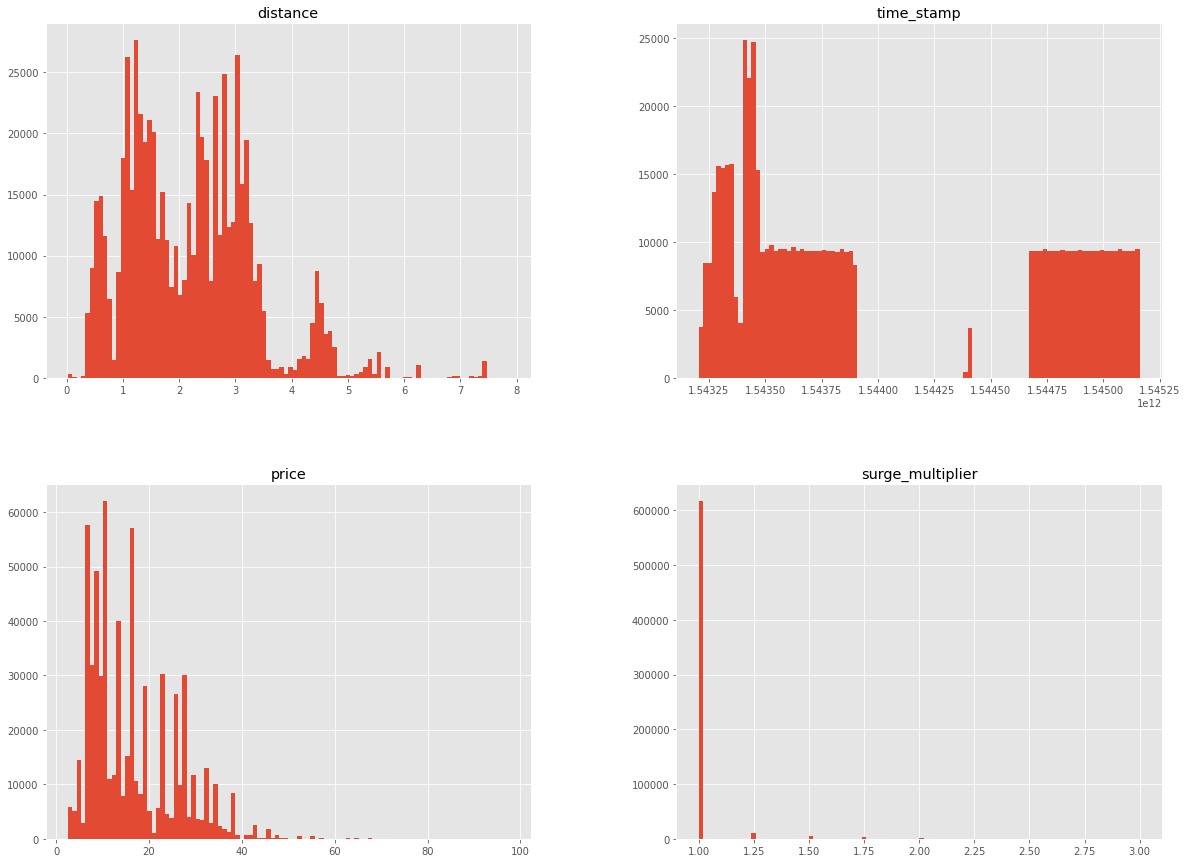

In [ ]:
#@title
cab_rides.hist(bins=100,figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


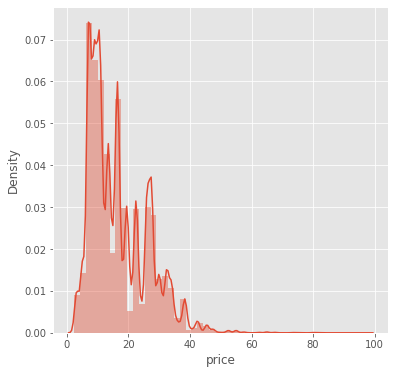

In [ ]:
#Price Range Checks

plt.figure(figsize=(6,6))
sns.distplot(cab_rides["price"], hist=True);

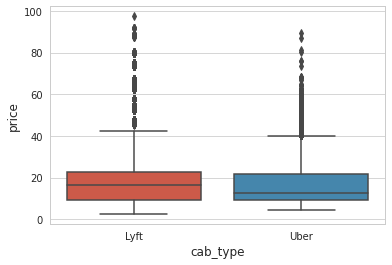

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='cab_type',y='price',data=cab_rides)

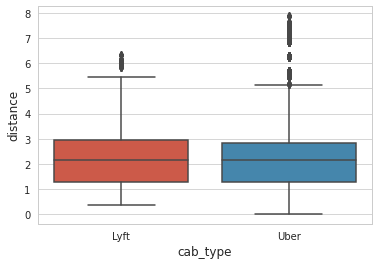

In [ ]:
ax= sns.boxplot(x='cab_type',y='distance',data=cab_rides)

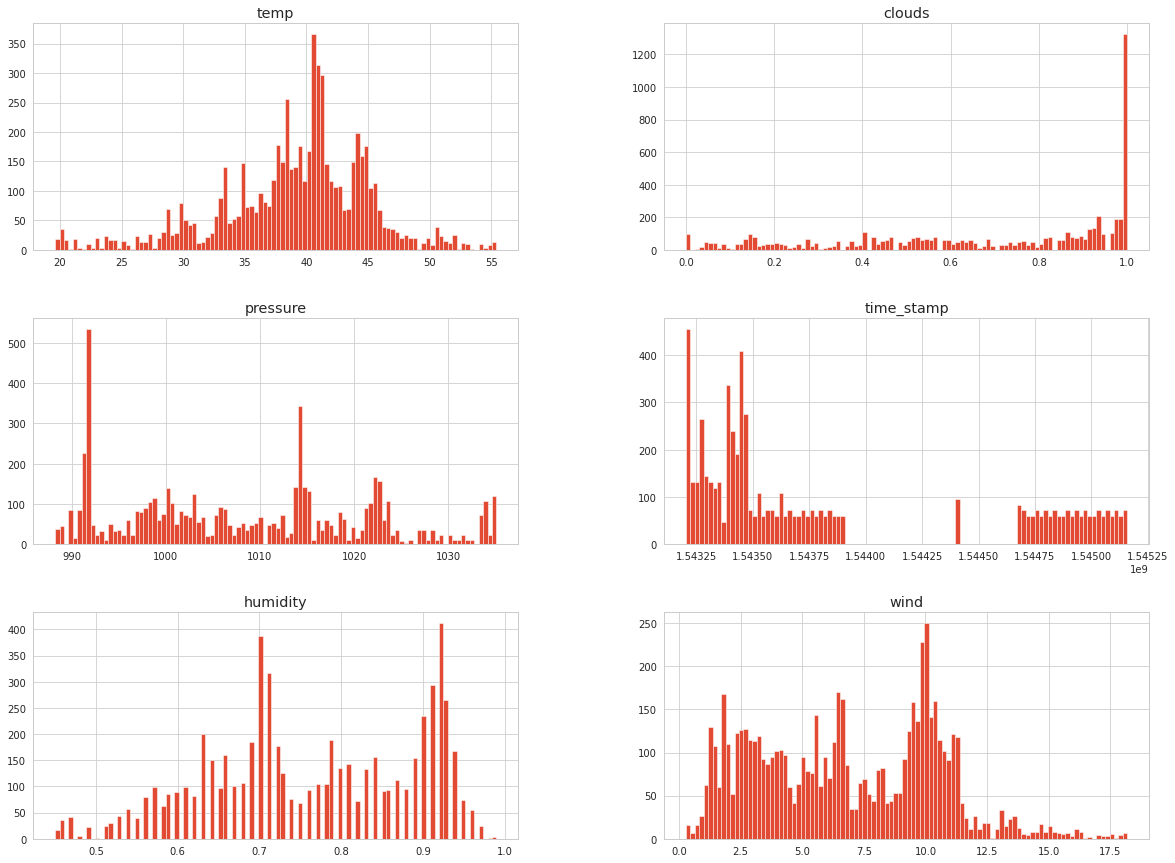

In [ ]:
#@title
weather.hist(bins=100,figsize=(20,15))
plt.show()

#weather.plot.scatter('temp','pressure')


# Merging two datasets 

1.   Join of rides and weather details of source (Using timestamp, source)
2.   Join of rides and weather details of destination (Using timestamp, destination)





In [ ]:
#@title
from numpy.ma.core import count
#Create a new time stamp column in rides dataframe

#weather['time_stamp_date']=weather['time_stamp']
weather['time_stamp'].head()
weather['time_stamp'][0]

1545003901

In [ ]:
cab_rides['time_stamp_date']=cab_rides['time_stamp']/1000
#cab_rides['time_stamp'].head()

In [ ]:
import math
print(math.floor(1544952607890/1000))

1544952607


In [ ]:
#@title
weather[weather['location']=='Back Bay'].to_csv('weather_data_backbay.csv')

In [ ]:
#@title
weather[weather['location']=='Beacon Hill'].head()

,temp,location,clouds,pressure,time_stamp,humidity,wind
1,42.43,Beacon Hill,1.00,1012.15,1545003901,0.76,11.32
12,43.27,Beacon Hill,0.80,990.80,1543347920,0.71,8.30
26,39.18,Beacon Hill,0.83,996.08,1543449727,0.67,10.69
37,27.27,Beacon Hill,0.15,1033.40,1544787901,0.81,2.99
48,45.42,Beacon Hill,1.00,1012.47,1543253710,0.86,6.48


In [ ]:
#@title
a_df=pd.to_datetime(weather['time_stamp'],unit='s').dt.minute

In [ ]:
a_df

0       45
1       45
2       45
3       45
4       45
        ..
6271    52
6272    52
6273    52
6274    52
6275    52
Name: time_stamp, Length: 6276, dtype: int64

In [ ]:
  #@title
ts_exp=pd.DataFrame(a_df, columns=['time_stamp']).groupby(['time_stamp']).size()

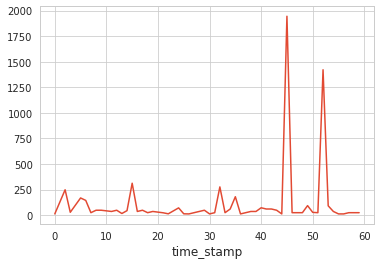

In [ ]:
#@title
ts_exp.plot()

Code starts here

In [ ]:
#@title
#Convert timestamp to date format - weather

weather['time_stamp_date']=pd.to_datetime(weather['time_stamp'], unit='s').dt.date
weather['time_stamp_hour']=pd.to_datetime(weather['time_stamp'], unit='s').dt.hour
weather['time_stamp_minutes']=pd.to_datetime(weather['time_stamp'], unit='s').dt.minute

#Check the data
weather.head()


,temp,location,clouds,pressure,time_stamp,humidity,wind,time_stamp_date,time_stamp_hour,time_stamp_minutes
0,42.42,Back Bay,1.0,1012.14,1545003901,0.77,11.25,2018-12-16,23,45
1,42.43,Beacon Hill,1.0,1012.15,1545003901,0.76,11.32,2018-12-16,23,45
2,42.50,Boston University,1.0,1012.15,1545003901,0.76,11.07,2018-12-16,23,45
3,42.11,Fenway,1.0,1012.13,1545003901,0.77,11.09,2018-12-16,23,45
4,43.13,Financial District,1.0,1012.14,1545003901,0.75,11.49,2018-12-16,23,45


In [ ]:
#@title
f={'temp':['mean'],
   'clouds':['mean'],
   'pressure':['mean'],
   'humidity':['mean'],
   'wind':['mean']
  }
weather_source=weather.groupby(['time_stamp_date','time_stamp_hour','location'],as_index=False).mean()
weather_source.drop(['time_stamp','time_stamp_minutes'],axis=1,inplace=True)
weather_source.rename(columns={"location": "source"},inplace=True)
weather_source.head()

,time_stamp_date,time_stamp_hour,source,temp,clouds,pressure,humidity,wind
0,2018-11-26,3,Back Bay,41.04,0.87,1014.39,0.92,1.46
1,2018-11-26,3,Beacon Hill,41.02,0.87,1014.39,0.92,1.50
2,2018-11-26,3,Boston University,41.07,0.86,1014.39,0.92,1.36
3,2018-11-26,3,Fenway,40.84,0.88,1014.35,0.93,1.31
4,2018-11-26,3,Financial District,40.95,0.89,1014.35,0.93,1.49


In [ ]:
#@title
f={'temp':['mean'],
   'clouds':['mean'],
   'pressure':['mean'],
   'humidity':['mean'],
   'wind':['mean']
  }
weather_destination=weather.groupby(['time_stamp_date','time_stamp_hour','location'],as_index=False).mean()
weather_destination.drop(['time_stamp','time_stamp_minutes'],axis=1,inplace=True)
weather_destination.rename(columns={"location": "destination"},inplace=True)
weather_destination.head()

,time_stamp_date,time_stamp_hour,destination,temp,clouds,pressure,humidity,wind
0,2018-11-26,3,Back Bay,41.04,0.87,1014.39,0.92,1.46
1,2018-11-26,3,Beacon Hill,41.02,0.87,1014.39,0.92,1.50
2,2018-11-26,3,Boston University,41.07,0.86,1014.39,0.92,1.36
3,2018-11-26,3,Fenway,40.84,0.88,1014.35,0.93,1.31
4,2018-11-26,3,Financial District,40.95,0.89,1014.35,0.93,1.49


In [ ]:
#@title
#Convert timestamp to date format - Cab rides
cab_rides['time_stamp']=cab_rides['time_stamp']/1000   # Change from nano seconds to seconds
cab_rides['time_stamp']=cab_rides['time_stamp'].apply(np.floor)  # Remove the decimals by taking floor value

cab_rides['time_stamp_date']=pd.to_datetime(cab_rides['time_stamp'], unit='s').dt.date
cab_rides['time_stamp_hour']=pd.to_datetime(cab_rides['time_stamp'], unit='s').dt.hour
cab_rides['time_stamp_minutes']=pd.to_datetime(cab_rides['time_stamp'], unit='s').dt.minute

#Check the data
cab_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time_stamp_date,time_stamp_hour,time_stamp_minutes
0,0.44,Lyft,1.544953e+09,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16,9,30
1,0.44,Lyft,1.543284e+09,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27,2,0
2,0.44,Lyft,1.543367e+09,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28,1,0
3,0.44,Lyft,1.543554e+09,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30,4,53
4,0.44,Lyft,1.543463e+09,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29,3,49


Temperature stored in weathers dataset is mostly during 45th minute and 55th minute - Joining the dataset of cab_rides and weather(With date, source and hour+1=hour)

In [ ]:
#@title
cab_rides_final=pd.merge(cab_rides,weather_source,how='left',on=['time_stamp_date','time_stamp_hour','source'])
cab_rides_final.rename(columns={'temp':'source_temp','clouds':'source_clouds','pressure':'source_pressure','humidity':'source_humidity','wind':'source_wind'},inplace=True)


In [ ]:
#@title
print(len(cab_rides_final))
print(len(cab_rides))

637976
637976


In [ ]:
#@title
cab_rides_final=pd.merge(cab_rides_final,weather_destination,how='left',on=['time_stamp_date','time_stamp_hour','destination'])
cab_rides_final.rename(columns={'temp':'destination_temp','clouds':'destination_clouds','pressure':'destination_pressure','humidity':'destination_humidity','wind':'destination_wind'},inplace=True)

cab_rides_final.loc[(cab_rides_final.time_stamp_hour >= 6) & (cab_rides_final.time_stamp_hour < 12) , 'time_of_day'] = 'Morning'
cab_rides_final.loc[(cab_rides_final.time_stamp_hour >= 12) & (cab_rides_final.time_stamp_hour < 15) , 'time_of_day'] = 'Afternoon'
cab_rides_final.loc[(cab_rides_final.time_stamp_hour >= 15) & (cab_rides_final.time_stamp_hour < 18) , 'time_of_day'] = 'Evening'
cab_rides_final.loc[(cab_rides_final.time_stamp_hour >= 18) | (cab_rides_final.time_stamp_hour < 6) , 'time_of_day'] = 'Night'


cab_rides_final['weekday'] = cab_rides_final['time_stamp_date'].apply(lambda x: x.weekday())
cab_rides_final["weekday"] = cab_rides_final["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})


In [ ]:
#@title
print(len(cab_rides_final))
print(len(cab_rides))

637976
637976


In [ ]:
#@title
print(cab_rides_final.columns)
cab_rides_final.head()

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'time_stamp_date',
       'time_stamp_hour', 'time_stamp_minutes', 'source_temp', 'source_clouds',
       'source_pressure', 'source_humidity', 'source_wind', 'destination_temp',
       'destination_clouds', 'destination_pressure', 'destination_humidity',
       'destination_wind', 'time_of_day', 'weekday'],
      dtype='object')


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time_stamp_date,time_stamp_hour,time_stamp_minutes,source_temp,source_clouds,source_pressure,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_humidity,destination_wind,time_of_day,weekday
0,0.44,Lyft,1.544953e+09,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16,9,30,38.460,0.290000,1022.25,0.760000,7.68,38.43,0.220000,1022.420000,0.76,7.84,Morning,Sunday
1,0.44,Lyft,1.543284e+09,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27,2,0,44.065,0.995000,1002.88,0.895000,12.63,44.02,0.995000,1002.885000,0.90,12.58,Night,Tuesday
2,0.44,Lyft,1.543367e+09,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night,Wednesday
3,0.44,Lyft,1.543554e+09,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30,4,53,35.080,0.000000,1013.71,0.700000,5.25,35.06,0.000000,1013.710000,0.70,5.22,Night,Friday
4,0.44,Lyft,1.543463e+09,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29,3,49,37.680,0.433333,998.42,0.706667,11.16,37.61,0.433333,998.423333,0.71,11.12,Night,Thursday


In [ ]:
cab_rides_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 637975
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   distance              637976 non-null  float64
 1   cab_type              637976 non-null  object 
 2   time_stamp            637976 non-null  float64
 3   destination           637976 non-null  object 
 4   source                637976 non-null  object 
 5   price                 637976 non-null  float64
 6   surge_multiplier      637976 non-null  float64
 7   id                    637976 non-null  object 
 8   product_id            637976 non-null  object 
 9   name                  637976 non-null  object 
 10  time_stamp_date       637976 non-null  object 
 11  time_stamp_hour       637976 non-null  int64  
 12  time_stamp_minutes    637976 non-null  int64  
 13  source_temp           635242 non-null  float64
 14  source_clouds         635242 non-null  float64
 15  

### Final Dataset

In [ ]:
0#@title
cab_rides_final.to_csv('cab_rides_final.csv')

# Hypothesis Testing and Data Exploration

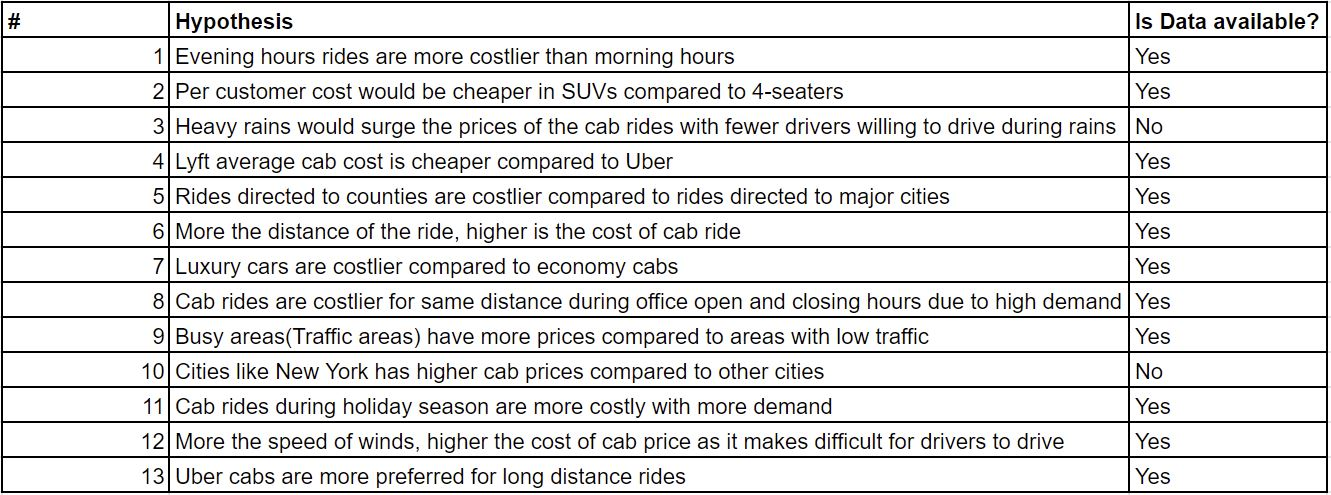

### Data Exploration

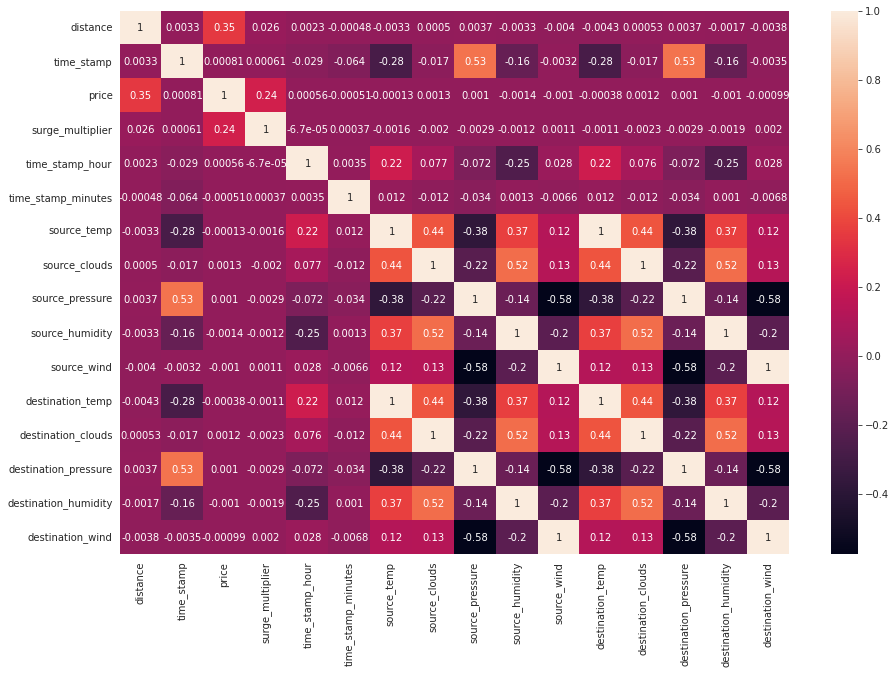

In [ ]:
#Correlation between columns
num_cols = [col for col in cab_rides_final.columns if cab_rides_final[col].dtypes != "O"]
plt.figure(figsize=(15, 10))
sns.heatmap(cab_rides_final[num_cols].corr(),annot = True);

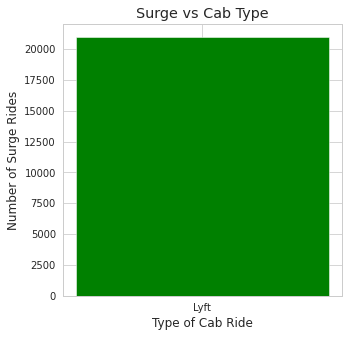

In [ ]:
#Surge Multiplier for cab type

surge_df=cab_rides_final[cab_rides_final['surge_multiplier']>1]

hyp=surge_df.groupby(['cab_type'],as_index=False).count()
x=hyp['cab_type']
price=hyp['price']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(5,5))
plt.bar(x_pos, price, color='green')
plt.xlabel("Type of Cab Ride")
plt.ylabel("Number of Surge Rides")
plt.title("Surge vs Cab Type")

plt.xticks(x_pos, x)
plt.show()

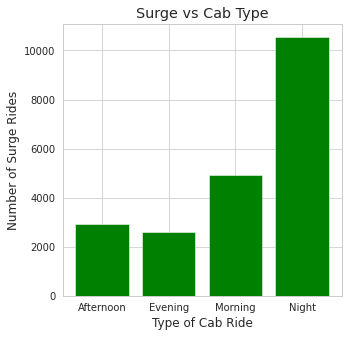

In [ ]:
#Surge Multiplier for Time of the day

hyp=surge_df.groupby(['time_of_day'],as_index=False).count()
x=hyp['time_of_day']
price=hyp['price']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(5,5))
plt.bar(x_pos, price, color='green')
plt.xlabel("Type of Cab Ride")
plt.ylabel("Number of Surge Rides")
plt.title("Surge vs Cab Type")

plt.xticks(x_pos, x)
plt.show()

In [ ]:
surge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20975 entries, 244 to 637724
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   distance              20975 non-null  float64
 1   cab_type              20975 non-null  object 
 2   time_stamp            20975 non-null  float64
 3   destination           20975 non-null  object 
 4   source                20975 non-null  object 
 5   price                 20975 non-null  float64
 6   surge_multiplier      20975 non-null  float64
 7   id                    20975 non-null  object 
 8   product_id            20975 non-null  object 
 9   name                  20975 non-null  object 
 10  time_stamp_date       20975 non-null  object 
 11  time_stamp_hour       20975 non-null  int64  
 12  time_stamp_minutes    20975 non-null  int64  
 13  source_temp           20884 non-null  float64
 14  source_clouds         20884 non-null  float64
 15  source_pressure 

There are no surge rides in Uber. However Lyft has surged the price for many rides depending on the conditions 

### Hypothesis Testing

https://docs.google.com/spreadsheets/d/17TqvWWfeGY0_d4ZV4LORJblNKHg8aStIt0Ep8fho4EI/edit#gid=2122810012

1. Evening hours rides are more costlier than morning hours

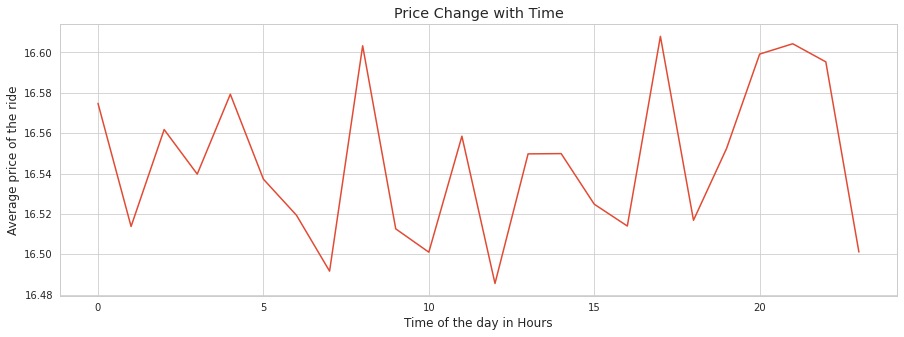

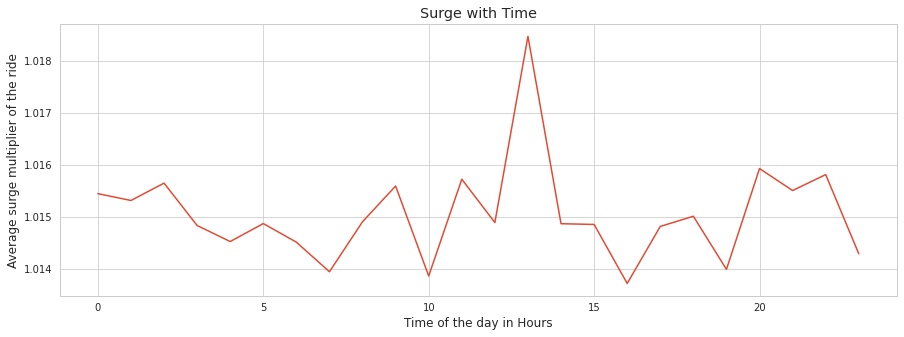

In [ ]:
#@title
#Check the range of price for each hour of the day
#cab_rides_final.plot.line(x='time_stamp_hour', y='price')
hyp1=cab_rides_final.groupby(['time_stamp_hour'],as_index=False).mean()

plt.figure(figsize=(15,5))

plt.plot(hyp1['time_stamp_hour'], hyp1['price'])
#plt.plot(hyp1['time_stamp_hour'], hyp1['surge_multiplier'])
plt.title("Price Change with Time")
plt.xlabel("Time of the day in Hours")
plt.ylabel("Average price of the ride")
plt.show()

#plt.plot(hyp1['time_stamp_hour'], hyp1['price'])
plt.figure(figsize=(15,5))
plt.plot(hyp1['time_stamp_hour'], hyp1['surge_multiplier'])
plt.title("Surge with Time")
plt.xlabel("Time of the day in Hours")
plt.ylabel("Average surge multiplier of the ride")
plt.show()

Finding: 

2. Lyft average cab cost is cheaper compared to Uber 

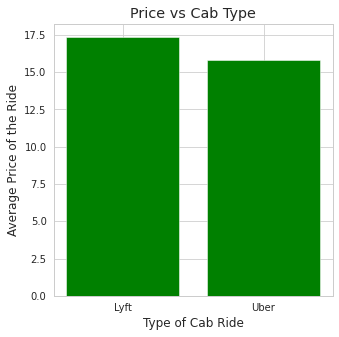

In [ ]:
#@title
#Check the range of price for each hour of the day
#cab_rides_final.plot.line(x='time_stamp_hour', y='price')

hyp2=cab_rides_final.groupby(['cab_type'],as_index=False).mean()
x=hyp2['cab_type']
price=hyp2['price']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(5,5))
plt.bar(x_pos, price, color='green')
plt.xlabel("Type of Cab Ride")
plt.ylabel("Average Price of the Ride")
plt.title("Price vs Cab Type")

plt.xticks(x_pos, x)
plt.show()


3. Per customer cost would be cheaper in SUVs compared to 4-seaters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.pat

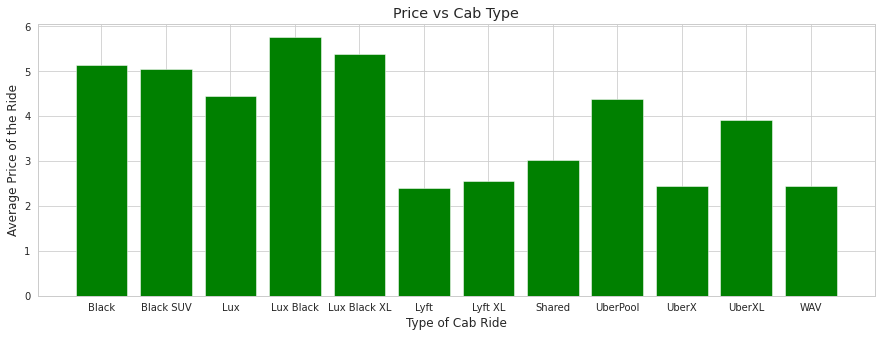

In [ ]:
#@title
#Check the range of price for each hour of the day
#cab_rides_final.plot.line(x='time_stamp_hour', y='price')

hyp3=cab_rides_final.groupby(['name'],as_index=False).mean()
x=hyp3['name']


for i in range(len(hyp3['name'])):
  if hyp3['name'][i] in ['Black SUV','Lux Black XL','Lyft XL']:
    hyp3['price'][i]=hyp3['price'][i]/6
  elif hyp3['name'][i] in ('Shared','UberPool'):
    hyp3['price'][i]=hyp3['price'][i]/2
  else:
    hyp3['price'][i]=hyp3['price'][i]/4

price=hyp3['price']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(15,5))
plt.bar(x_pos, price, color='green')
plt.xlabel("Type of Cab Ride")
plt.ylabel("Average Price of the Ride")
plt.title("Price vs Cab Type")

plt.xticks(x_pos, x)
plt.show()


4. Surge Rides are mostly during Weekend with higher demand

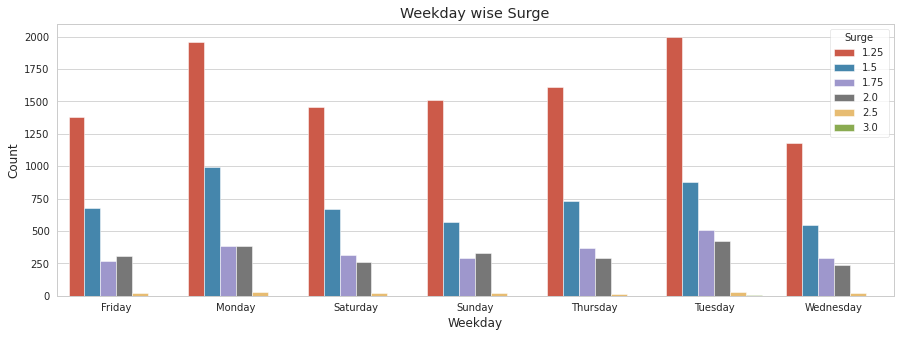

In [ ]:
#Surge Multiplier for Week of the day

t_high_surge = pd.DataFrame(surge_df.groupby(["weekday", "surge_multiplier"]).size().reset_index())
t_high_surge.columns = ["Weekday", "Surge", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(x="Weekday", y="Count", hue="Surge", data=t_high_surge).set_title("Weekday wise Surge");


5. More the distance of the ride, higher is the cost of cab ride

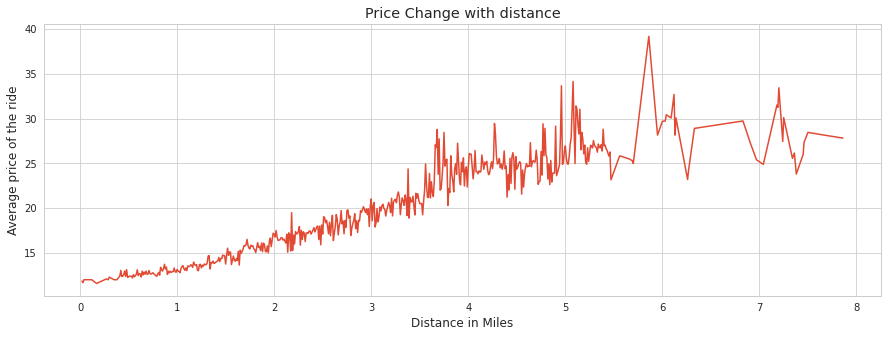

In [ ]:
#@title
#Check the range of price for each hour of the day
#cab_rides_final.plot.line(x='time_stamp_hour', y='price')
hyp5=cab_rides_final.groupby(['distance'],as_index=False).mean()
plt.figure(figsize=(15, 5))
plt.plot(hyp5['distance'], hyp5['price'])
plt.title("Price Change with distance")
plt.xlabel("Distance in Miles")
plt.ylabel("Average price of the ride")
plt.show()

6. Uber cabs are more preferred for long distance rides

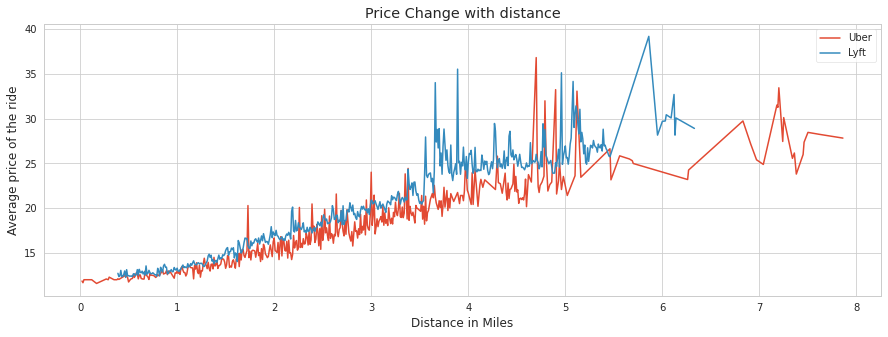

In [ ]:
#@title
#Check the range of price for each hour of the day
#cab_rides_final.plot.line(x='time_stamp_hour', y='price')
hyp6=cab_rides_final.groupby(['cab_type','distance'],as_index=False).mean()
plt.figure(figsize=(15, 5))
uber=hyp6[hyp6['cab_type']=='Uber']
plt.plot(uber['distance'], uber['price'],label = "Uber")
lyft=hyp6[hyp6['cab_type']=='Lyft']
plt.plot(lyft['distance'], lyft['price'],label = "Lyft")
plt.title("Price Change with distance")
plt.xlabel("Distance in Miles")
plt.ylabel("Average price of the ride")
plt.legend()
plt.show()

7. Cab rides during holiday season are more costly with more demand

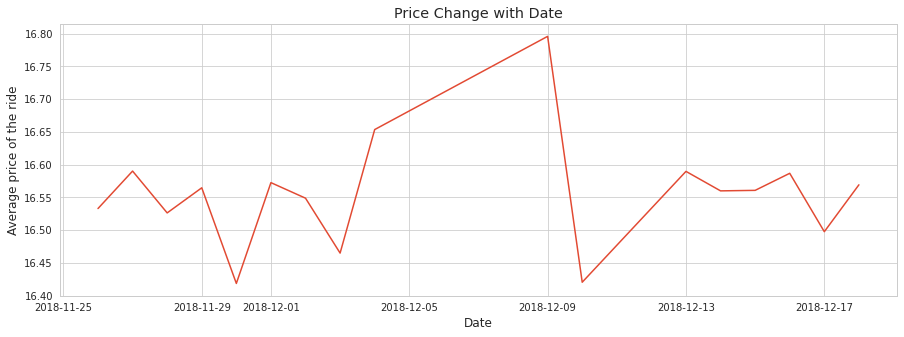

In [ ]:
#@title
#Check the range of price for each hour of the day
#cab_rides_final.plot.line(x='time_stamp_hour', y='price')
hyp10=cab_rides_final.groupby(['time_stamp_date'],as_index=False).mean()
plt.figure(figsize=(15,5))

plt.plot(hyp10['time_stamp_date'], hyp10['price'])
plt.title("Price Change with Date")
plt.xlabel("Date")
plt.ylabel("Average price of the ride")
plt.show()

8. Rides directed to counties are costlier compared to rides directed to major cities

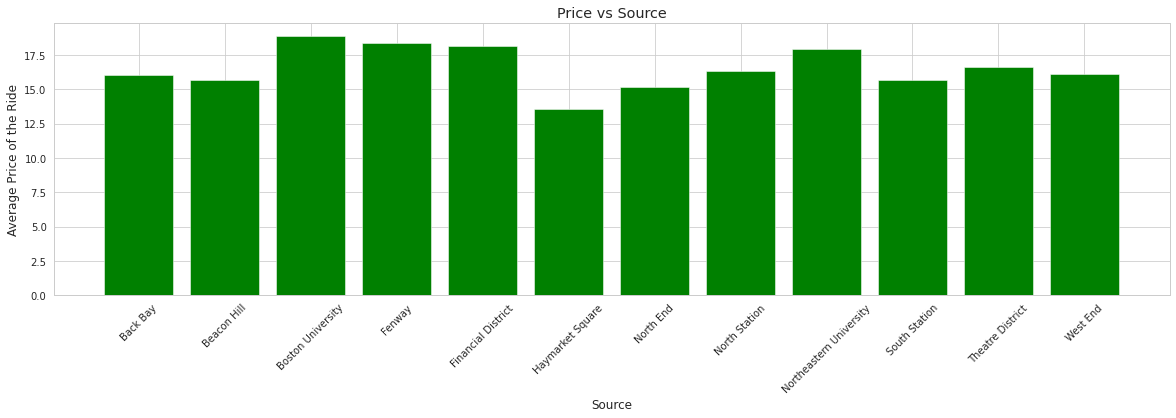

In [ ]:
#@title
hyp8=cab_rides_final.groupby(['source'],as_index=False).mean()
x=hyp8['source']


price=hyp8['price']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(20,5))
plt.bar(x_pos, price, color='green')
plt.xlabel("Source")
plt.ylabel("Average Price of the Ride")
plt.title("Price vs Source")

plt.xticks(x_pos, x)
plt.xticks(rotation=45)
plt.show()


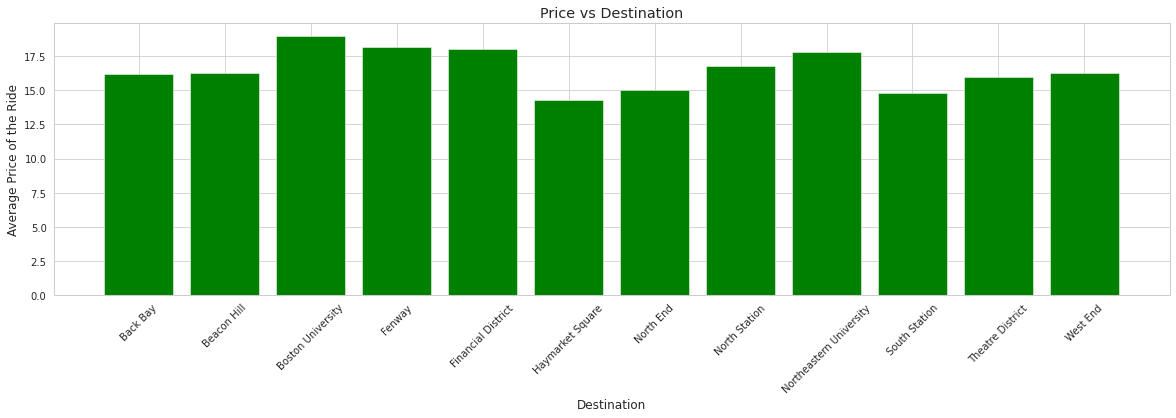

In [ ]:
#@title
hyp9=cab_rides_final.groupby(['destination'],as_index=False).mean()
x=hyp9['destination']


price=hyp9['price']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(20,5))
plt.bar(x_pos, price, color='green')
plt.xlabel("Destination")
plt.ylabel("Average Price of the Ride")
plt.title("Price vs Destination")

plt.xticks(x_pos, x)
plt.xticks(rotation=45)
plt.show()


Source Winds

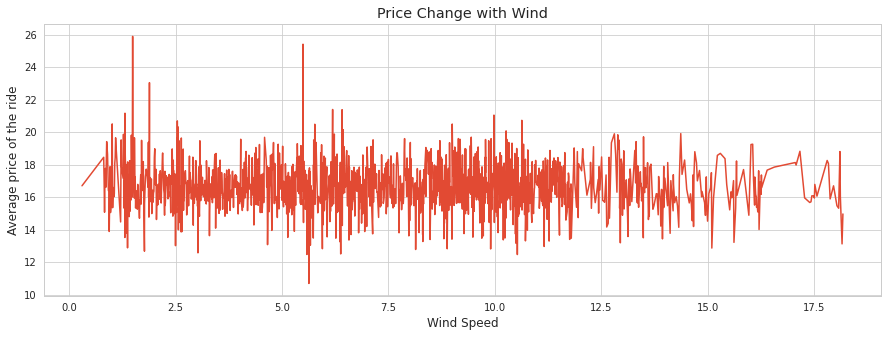

In [ ]:
#@title
#Check the range of price for each hour of the day
#cab_rides_final.plot.line(x='time_stamp_hour', y='price')
hyp10=cab_rides_final.groupby(['source_wind'],as_index=False).mean()
plt.figure(figsize=(15,5))

plt.plot(hyp10['source_wind'], hyp10['price'])
plt.title("Price Change with Wind")
plt.xlabel("Wind Speed")
plt.ylabel("Average price of the ride")
plt.show()

Source Temperature

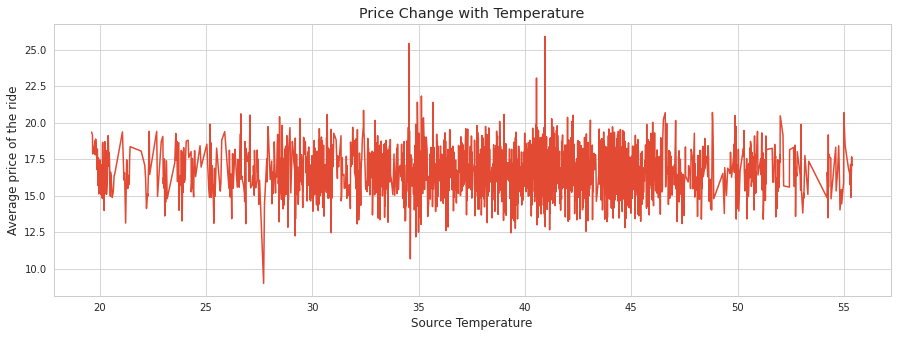

In [ ]:
#@title
#Check the range of price for each hour of the day
#cab_rides_final.plot.line(x='time_stamp_hour', y='price')
hyp10=cab_rides_final.groupby(['source_temp'],as_index=False).mean()
plt.figure(figsize=(15,5))

plt.plot(hyp10['source_temp'], hyp10['price'])
plt.title("Price Change with Temperature")
plt.xlabel("Source Temperature")
plt.ylabel("Average price of the ride")
plt.show()

Source Pressure

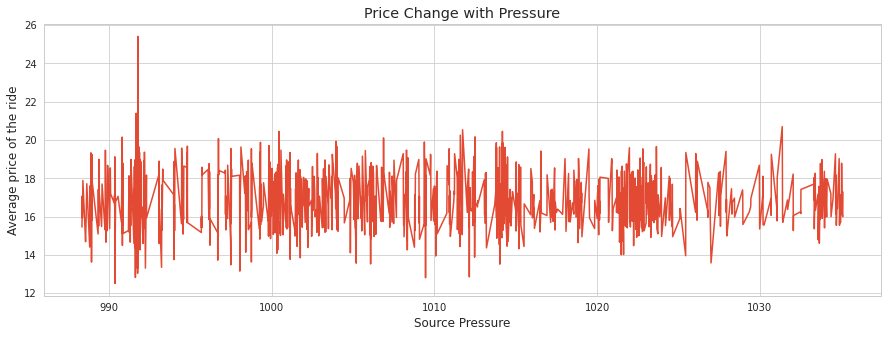

In [ ]:
#@title
#Check the range of price for each hour of the day
#cab_rides_final.plot.line(x='time_stamp_hour', y='price')
hyp10=cab_rides_final.groupby(['source_pressure'],as_index=False).mean()
plt.figure(figsize=(15,5))

plt.plot(hyp10['source_pressure'], hyp10['price'])
plt.title("Price Change with Pressure")
plt.xlabel("Source Pressure")
plt.ylabel("Average price of the ride")
plt.show()

### List of all Findings


1.   Distance  
2.   Temperature 



## Final List of Variables used for Modeling

# Dataset preparation and Split

Training:Validation:Test = 70:30

In [ ]:
print(cab_rides_final.columns)
#@title
print(len(cab_rides))
cab_rides_final.dropna(inplace=True)
print(len(cab_rides))

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'time_stamp_date',
       'time_stamp_hour', 'time_stamp_minutes', 'source_temp', 'source_clouds',
       'source_pressure', 'source_humidity', 'source_wind', 'destination_temp',
       'destination_clouds', 'destination_pressure', 'destination_humidity',
       'destination_wind', 'time_of_day', 'weekday'],
      dtype='object')
637976
637976


In [ ]:
#Columns to be used in the model
df=cab_rides_final[['distance', 'cab_type', 'destination', 'source', 'name', 'source_temp', 'source_clouds',
'source_pressure', 'source_humidity', 'source_wind', 'destination_temp',
'destination_clouds', 'destination_pressure', 'destination_humidity','weekday','time_of_day',
'destination_wind','price']]

catg_columns=['cab_type', 'destination', 'source', 'name','weekday','time_of_day']
df2 = pd.get_dummies(df, columns=catg_columns, drop_first=True)
df2.head()


,distance,source_temp,source_clouds,source_pressure,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_humidity,destination_wind,price,cab_type_Uber,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0.44,38.460,0.290000,1022.25,0.760000,7.68,38.43,0.220000,1022.420000,0.76,7.84,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.44,44.065,0.995000,1002.88,0.895000,12.63,44.02,0.995000,1002.885000,0.90,12.58,11.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.44,35.080,0.000000,1013.71,0.700000,5.25,35.06,0.000000,1013.710000,0.70,5.22,26.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.44,37.680,0.433333,998.42,0.706667,11.16,37.61,0.433333,998.423333,0.71,11.12,9.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,0.44,40.780,0.930000,1000.15,0.790000,7.55,40.82,0.930000,1000.150000,0.78,7.54,16.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
X=df2[df2.columns.drop(['price'])]

Y=df['price']
X.head()

,distance,source_temp,source_clouds,source_pressure,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_humidity,destination_wind,cab_type_Uber,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0.44,38.460,0.290000,1022.25,0.760000,7.68,38.43,0.220000,1022.420000,0.76,7.84,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.44,44.065,0.995000,1002.88,0.895000,12.63,44.02,0.995000,1002.885000,0.90,12.58,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.44,35.080,0.000000,1013.71,0.700000,5.25,35.06,0.000000,1013.710000,0.70,5.22,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.44,37.680,0.433333,998.42,0.706667,11.16,37.61,0.433333,998.423333,0.71,11.12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,0.44,40.780,0.930000,1000.15,0.790000,7.55,40.82,0.930000,1000.150000,0.78,7.54,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state=55)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Data Modeling

Prediction Variable: 
Independent Variables:

## Linear Regression

Model Code

In [ ]:
lm = LinearRegression()
lm.fit(X_train_std,y_train)
y_pred_lr = lm.predict(X_test_std)
print(y_pred_lr)

[17.01780279  7.12206609  9.33435109 ... 20.10571998 11.07127442
 18.32354098]


Model Results

In [ ]:
# Calculate accuracy
errors = abs(y_pred_lr - y_test)
mape = 100 * (errors / y_test)
accuracy_lr = 100 - np.mean(mape)
print('Accuracy:', round(accuracy_lr, 2), '%.')

Accuracy: 86.06 %.


Error Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


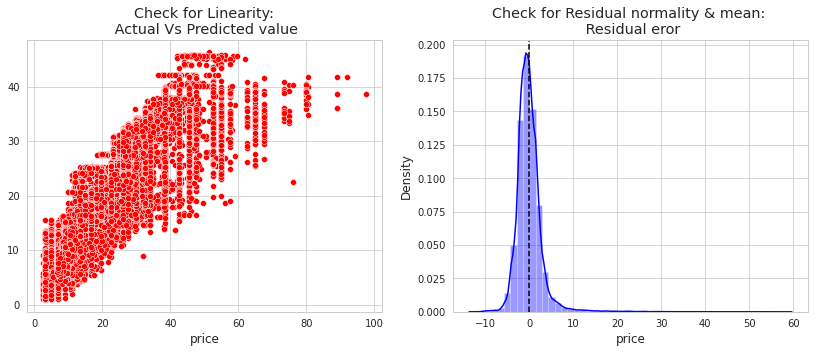

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_lr,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_lr),ax=ax,color='b')
ax.axvline((y_test - y_pred_lr).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## Random Forest

Model Code

In [ ]:
RF=RandomForestRegressor()
RF.fit(X_train_std,y_train)
y_pred_rf = RF.predict(X_test_std)
print(y_pred_rf)

[16.6         8.9225      7.787      ... 20.3935119  10.33935714
 16.59      ]


Model Results

In [ ]:
# Calculate accuracy
errors = abs(y_pred_rf - y_test)
mape = 100 * (errors / y_test)
accuracy_rf = 100 - np.mean(mape)
print('Accuracy:', round(accuracy_rf, 2), '%.')

Accuracy: 89.98 %.


Error Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


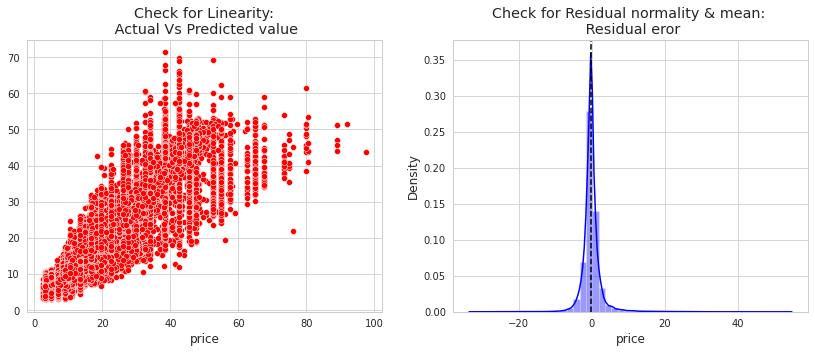

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_rf,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_rf),ax=ax,color='b')
ax.axvline((y_test - y_pred_rf).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [ ]:
print('R-Squared Value:', round(accuracy_rf, 2), '%.')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

R-Squared Value: 89.98 %.
Mean Absolute Error: 1.5045052942510257
Mean Squared Error: 7.486364810783426
Root Mean Squared Error: 2.7361222214629644


## Decision Tree

Model Code

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train_std, y_train)
Y_pred_dt = dt.predict(X_test_std)
print(Y_pred_dt)

[16.5         8.          7.         ... 20.25       10.33333333
 16.5       ]


Model Results

In [ ]:
# Calculate accuracy
errors = abs(Y_pred_dt - y_test)
mape = 100 * (errors / y_test)
accuracy_dt = 100 - np.mean(mape)
print('Accuracy:', round(accuracy_dt, 2), '%.')

Accuracy: 88.33 %.


Error Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


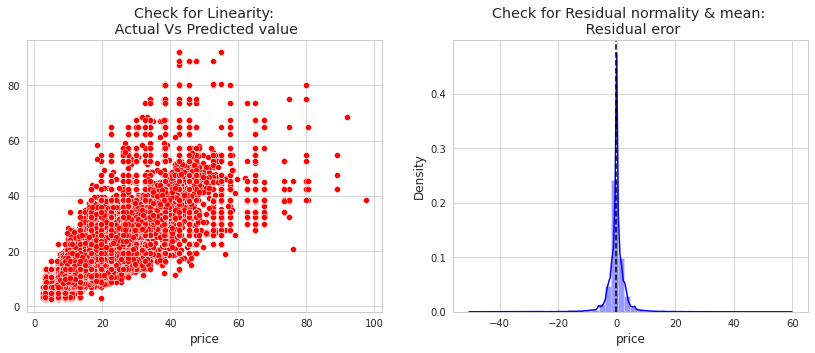

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,Y_pred_dt,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - Y_pred_dt),ax=ax,color='b')
ax.axvline((y_test - Y_pred_dt).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
nn.fit(X_train_std, y_train)
Y_pred_nn = nn.predict(X_test_std)
print(Y_pred_nn)

[18.04835502  8.6675567   7.64050479 ... 20.11211672 10.53030724
 16.12663425]


In [ ]:
# Calculate accuracy
errors = abs(Y_pred_nn - y_test)
mape = 100 * (errors / y_test)
accuracy_nn = 100 - np.mean(mape)
print('Accuracy:', round(accuracy_nn, 2), '%.')

Accuracy: 90.56 %.


Error Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


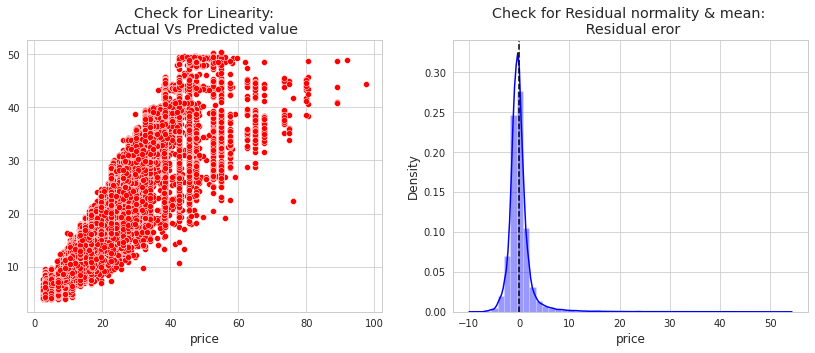

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,Y_pred_nn,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - Y_pred_nn),ax=ax,color='b')
ax.axvline((y_test - Y_pred_nn).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

##SVM

In [ ]:
#from sklearn.svm import SVR

#svm = SVR(kernel='linear', C=10.0)
#svm.fit(X_train_std, y_train)
#Y_pred_svm = svm.predict(X_test_std)
#print(Y_pred_svm)

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 1.0)
rr.fit(X_train_std, y_train)
Y_pred_rr = rr.predict(X_test_std)
print(Y_pred_rr)

[17.01774195  7.11913435  9.32701995 ... 20.10568635 11.07222231
 18.3233728 ]


In [ ]:
# Calculate accuracy
errors = abs(Y_pred_rr - y_test)
mape = 100 * (errors / y_test)
accuracy_rr = 100 - np.mean(mape)
print('Accuracy:', round(accuracy_rr, 2), '%.')

Accuracy: 86.06 %.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


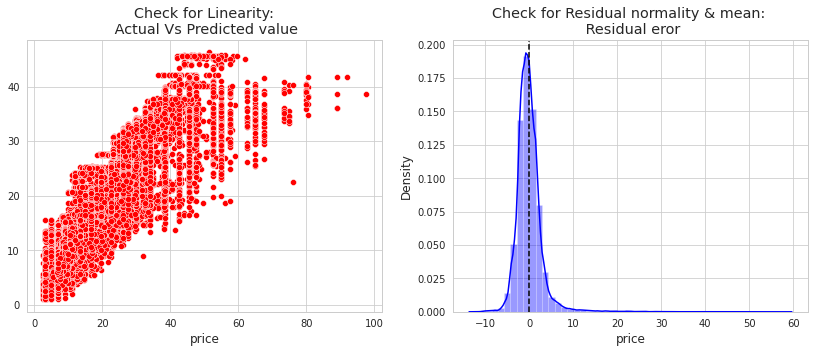

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,Y_pred_rr,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - Y_pred_rr),ax=ax,color='b')
ax.axvline((y_test - Y_pred_rr).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
la = Lasso(alpha = 1.0)
la.fit(X_train_std, y_train)
Y_pred_la = la.predict(X_test_std)
print(Y_pred_la)

[16.69416522 11.37809079 11.30765027 ... 15.91465356 14.28177172
 16.45626037]


In [ ]:
# Calculate accuracy
errors = abs(Y_pred_la - y_test)
mape = 100 * (errors / y_test)
accuracy_la = 100 - np.mean(mape)
print('Accuracy:', round(accuracy_la, 2), '%.')

Accuracy: 73.14 %.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


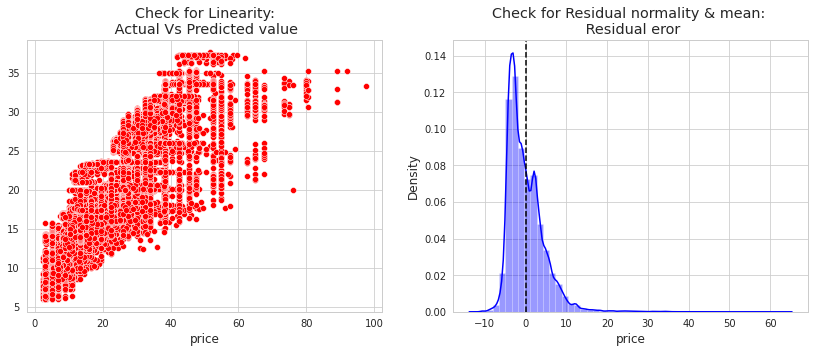

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,Y_pred_la,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - Y_pred_la),ax=ax,color='b')
ax.axvline((y_test - Y_pred_la).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## XG Boost

In [ ]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgb_r.fit(X_train_std, y_train)
Y_pred_xg = la.predict(X_test_std)
print(Y_pred_xg)

[18:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16.69416522 11.37809079 11.30765027 ... 15.91465356 14.28177172
 16.45626037]


In [ ]:
# Calculate accuracy
errors = abs(Y_pred_xg - y_test)
mape = 100 * (errors / y_test)
accuracy_xg = 100 - np.mean(mape)
print('Accuracy:', round(accuracy_xg, 2), '%.')

Accuracy: 73.14 %.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


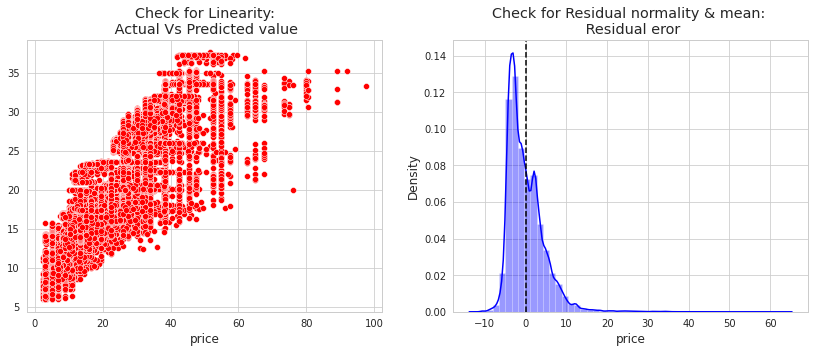

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,Y_pred_xg,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - Y_pred_xg),ax=ax,color='b')
ax.axvline((y_test - Y_pred_xg).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [ ]:
(y_test - Y_pred_xg).mean()


0.018117075383729978

## Best Model

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_dt)))
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_nn)))
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_la)))
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_xg)))


In [ ]:
df1=pd.DataFrame([["Linear regressor",accuracy_lr,np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),(y_test - y_pred_lr).mean()],["Random Forest",accuracy_rf,np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)),(y_test - y_pred_rf).mean()],
                  ["Decision Tree",accuracy_dt,np.sqrt(metrics.mean_squared_error(y_test, Y_pred_dt)),(y_test - Y_pred_dt).mean()],["Neural Network",accuracy_nn,np.sqrt(metrics.mean_squared_error(y_test, Y_pred_nn)),(y_test - Y_pred_nn).mean()],["Ridge Regression",accuracy_rr,np.sqrt(metrics.mean_squared_error(y_test, Y_pred_rr)),(y_test - Y_pred_rr).mean()],
                  ["Lasso Regression",accuracy_la,np.sqrt(metrics.mean_squared_error(y_test, Y_pred_la)),(y_test - Y_pred_la).mean()],["XG Boost",accuracy_xg,np.sqrt(metrics.mean_squared_error(y_test, Y_pred_xg)),(y_test - Y_pred_xg).mean()]],columns=["models","R-squared","RMSE","Residual Error Mean"])
df1

,models,R-squared,RMSE,Residual Error Mean
0,Linear regressor,86.064876,3.043699,0.003367
1,Random Forest,89.984570,2.736122,-0.055720
2,Decision Tree,88.325927,3.511097,-0.052299
3,Neural Network,90.556413,2.577448,0.057824
4,Ridge Regression,86.064888,3.043689,0.003444
5,Lasso Regression,73.143271,4.488702,0.012921
6,XG Boost,73.143271,4.488702,0.012921


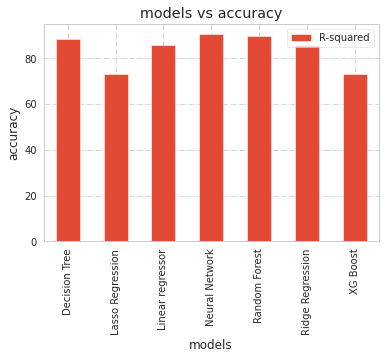

In [ ]:
e=pd.DataFrame(df1.groupby('models')['R-squared'].mean())
e.plot.bar(title='models vs accuracy')
plt.xlabel("models")
plt.ylabel("accuracy")
plt.grid(linestyle='-.')

In [ ]:
e=pd.DataFrame(df1)

In [ ]:
f.head()

,models,R-squared,RMSE,Residual Error Mean
0,Linear regressor,86.064876,3.043699,0.003367
1,Random Forest,89.984570,2.736122,-0.055720
2,Decision Tree,88.325927,3.511097,-0.052299
3,Neural Network,90.556413,2.577448,0.057824
4,Ridge Regression,86.064888,3.043689,0.003444


Text(0, 0.5, 'R-sq')

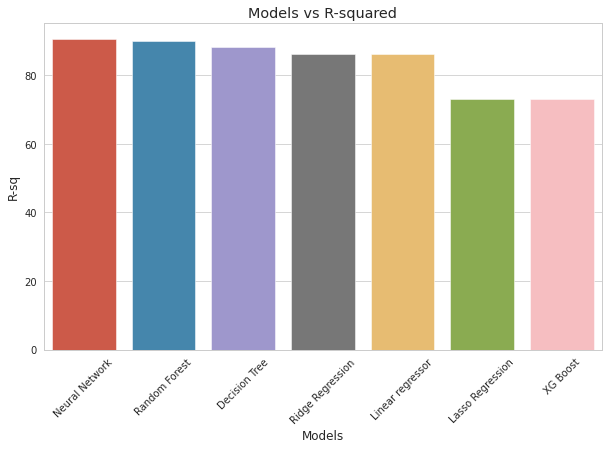

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='models',
            y='R-squared', 
            data=e, 
            order=e.sort_values('R-squared',ascending = False).models)

#plt.figure(figsize=(15,5))
plt.title("Models vs R-squared")
plt.xticks(rotation=45)
#e.plot.bar(title='Models vs R-squared')
plt.xlabel("Models")
plt.ylabel("R-sq")


# Recommendations/Conclusion

After each of the models performed on the dataset, we chose the best model which is Random Forest explaining 90% of variability of data to predict price of cab rides in Boston. Based on variable analysis and model output, following can be inferred to chose the cab ride








1.   Uber is preferred for long distance rides compared to Lyft as they are more prevalent and slightly lower in cost
2.   Even though average cost of Lyft is higher than Uber, pool and normal rides are cheaper when compared to Uber
1.   Late night rides are higher by 20% compared to normal rides
2.   Mondays and Tuesdays are costlier rides compared to other weekdays
1.   Even though data is less, it is evident that rain will have an impact on rides. So it recommended to check weather before planning ride unless it is important










# References

https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices